# Imports

In [ ]:
from __future__ import absolute_import,division,print_function,unicode_literals

#importing tensorflow,keras,matplotlib and numpy
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
tf.enable_eager_execution()


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data() 


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#print(train_images.shape)
print(type(train_images))
print(train_labels.shape)

<class 'numpy.ndarray'>
(60000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess The Data



In [ ]:
train_images = train_images/255.0;
test_images = test_images/255.0;

# Building The Model

In [ ]:
model = keras.Sequential([
         keras.layers.Flatten(input_shape=(28,28)),
         keras.layers.Dense(128,activation=tf.nn.relu),
         keras.layers.Dense(10,activation=tf.nn.softmax)])


**Compiling The Model**

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#Train The Model

In [ ]:
model.fit(train_images,train_labels,epochs=5)

W0719 06:15:21.678212 140352997709696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 14.5063 - acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 14.5063 - acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 14.5063 - acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 14.5063 - acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 14.5063 - acc: 0.1000


In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test Accuracy : ",test_acc)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.3620 - acc: 0.8662
Test Accuracy :  0.8662


# Predictions


In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[0])

9

**Plots**

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

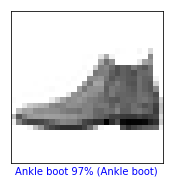

In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(0,predictions,test_labels,test_images)

# Generation Of Adversarial Images Using FGSM

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def generate_adversary(input_image,input_label):
  input_image = tf.cast(input_image,tf.float32)
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label,prediction)
    
  gradient = tape.gradient(loss, input_image)
  signed_grad = tf.sign(gradient)
  return signed_grad

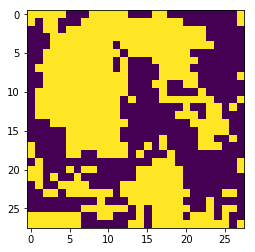

In [ ]:

img = test_images[0]
img = (np.expand_dims(img,0))
image = img
#print(img.shape)
#plt.imshow(img[0])
perturbations = generate_adversary(img,model.predict(img))
plt.imshow(perturbations[0])

In [ ]:
def display_images(img,image,description):
  predictions_array = model.predict(img)
  actual_array = model.predict(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[0])
  actual_label = np.argmax(actual_array)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == actual_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} \n {} {:2.0f}% ({})".format(description,class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[actual_label]),
                                color=color)
  plt.show()

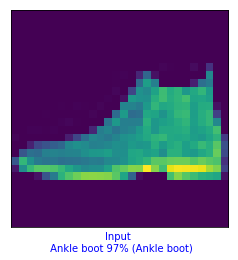

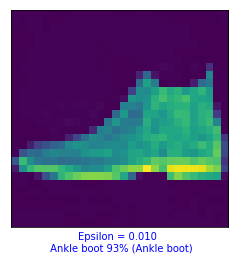

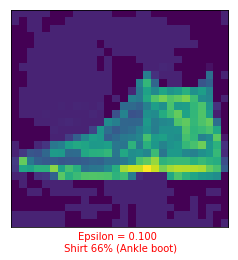

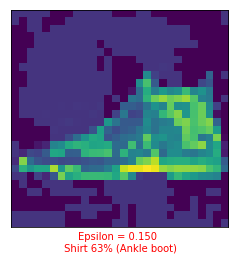

In [ ]:

epsilons = [0, 0.01,0.1,0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = img + eps*perturbations 
  adv_x = np.clip(adv_x, 0, 1)
  display_images(adv_x,image, descriptions[i])
